In [27]:
import pandas as pd
wine_data=pd.read_csv('winequality-red.csv',sep=';')
wine_data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

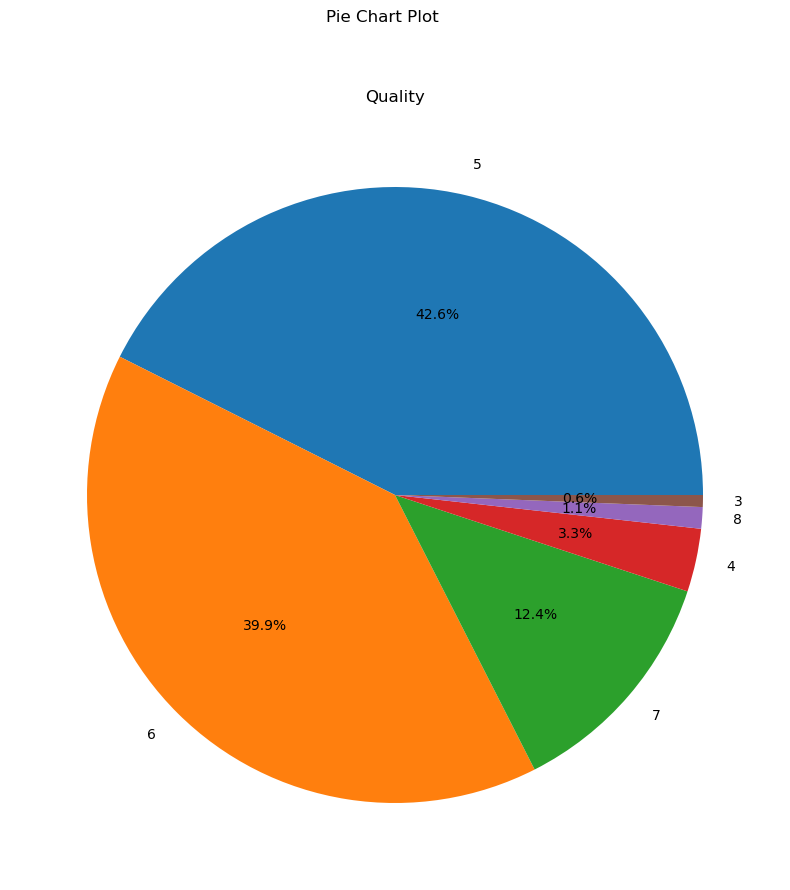

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Pie Chart Plot')

quality = wine_data['quality'].value_counts()
ax.pie(quality, labels=quality.index, autopct='%1.1f%%')
ax.set_title('Quality');

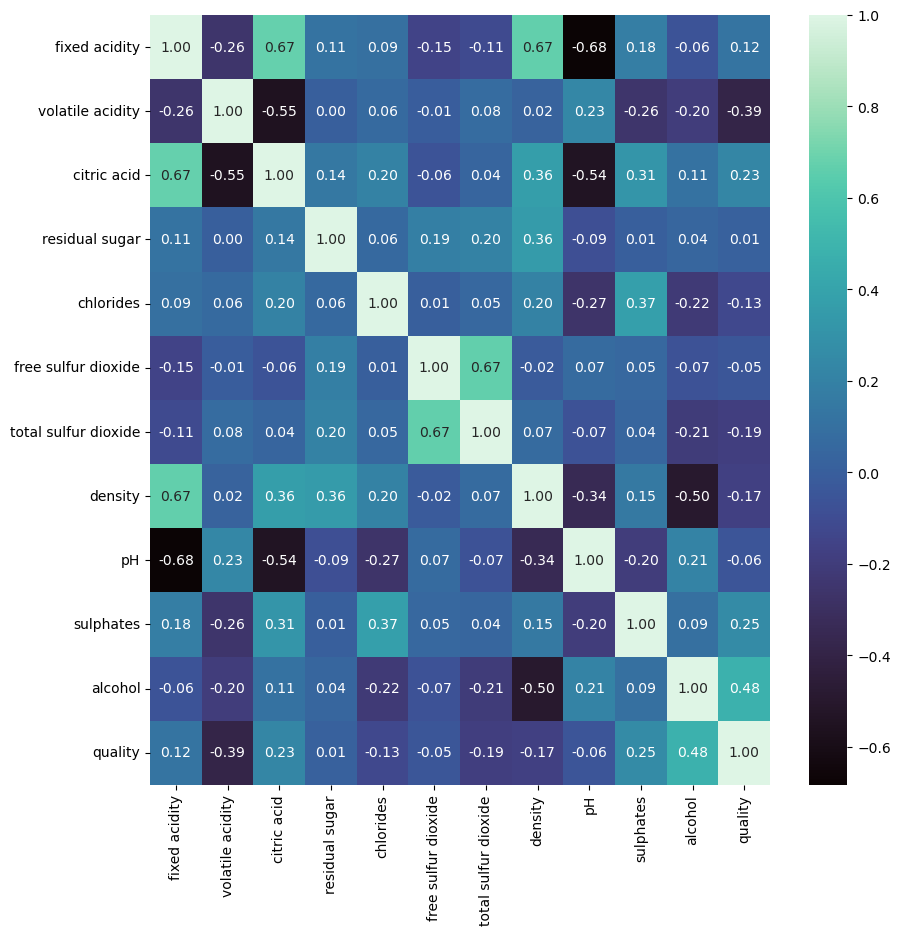

In [58]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(wine_data.corr(), annot=True, fmt=".2f", cmap=sns.color_palette("mako", as_cmap=True));

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
# Features (X) and target (y)
X = wine_data.drop(columns=['quality'])  # Drop the 'quality' column for features
y = wine_data['quality']  # 'quality' column is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [114]:
# standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [172]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set


RandomForestClassifier(random_state=42)

In [170]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted because you have multiple classes
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.6700
F1 Score: 0.6531


In [174]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model using GridSearch
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Calculate accuracy and F1 score for the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f'Best Accuracy: {accuracy_best:.4f}')
print(f'Best F1 Score: {f1_best:.4f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.6775
Best F1 Score: 0.6607


In [192]:
from sklearn.linear_model import LogisticRegression

# Testing LogisticRegression accuracy and F1
logreg = LogisticRegression(max_iter=10000)  # Increase the number of iterations
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy_LR = accuracy_score(y_test, y_pred)
print(f"Best Accuracy: {accuracy_LR}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {f1:.4f}')

Best Accuracy:0.5775
F1 score: 0.5499


In [234]:
from sklearn.svm import SVC

# training SVC{linear}
svm = SVC(kernel='linear')  # You can also try 'rbf' or 'poly' kernels
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy_SVC = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy_SVC:.4f}')
f1 =f1_score(y_test,y_pred,average='weighted')
print(f'F1 score: {f1:.4f}')


Best Accuracy: 0.5700
F1 score: 0.5169


In [230]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can change k as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_KN= accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy_KN:.4f}')
f1 =f1_score(y_test,y_pred,average='weighted')
print(f'F1 score: {f1:.4f}')

Best Accuracy: 0.4675
F1 score: 0.4441


In [238]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy_NB = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy_NB}')
f1 =f1_score(y_test,y_pred,average='weighted')
print(f'F1 score: {f1:.4f}')


Best Accuracy: 0.5525
F1 score: 0.5532


In [240]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy_DT = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy_DT}')
f1 =f1_score(y_test,y_pred,average='weighted')
print(f'F1 score: {f1:.4f}')

Best Accuracy: 0.5925
F1 score: 0.5977
